---
# <center style ="color:darkblue;"> Data Analysis with Pandas
---

## Introduction: 

#### The purpose of this project is to be able to introduce the Pandas Package. Specifically, we will be going through the basics of Pandas.IO API with a few examples and at the end, I will show a more advanced example of what Pandas could do with the basics we have. The following is what we will be doing in this notebook.

* Overview
* Reading from and to a CSV fle
* What exactly are Dataframes and what can you do with them
* Computational/Statistical Tools in pandas
* Examples

# Overview

Pandas is a Python package that provides a fast, efficient data analysis tools for doing practical, real world data analysis. The strengths of pandas lie in:

* reading in data
* manipulating rows and columns
* working with dates and series
* adjusting indices
* sorting,grouping, re-ordering and general data mugging
* dealing with missing values... etc

## Dataframe

The most important data type defined by pandas is a *Dataframe*, which is an object for storing related columns of data. In a sense, you can think of *Dataframe* as analogous to a 2-dimensional numpy like array that takes any data type (ie., strings, floats, long, int, etc..). What I mean by 2-dimensional is that is will look like a table. It will have *m* rows, *n* columns or like a (highly optimized) Excel spreadhseet.

## What can we do with a dataframe?
* *slice* data (to select specific data)
* reorganize the columns
* perform mathematical operations on the data! 
* standard deviation, covariance, correlation, etc

There will be some examples below!

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## What kind of file does Pandas read?

Pandas can read many different type of [files](http://pandas.pydata.org/pandas-docs/stable/io.html). However, some of the files that are most widely used are csv, excel, json, and html. In this notebook, we will be focusing on csv files

## What are CSV files?

A **CSV** is a **C**omma **S**eparated **V**alues file which allows data to be saved in a tabular format. Traditionally, they take the form of a text file containing information separated by commas, hence the name!
![title](http://wso2.com/project/data-services/2.6.3/docs/images/ds-wizard/csv/csv_file.png)

## Where can you get free financial data from? 

In class, we looked at [Quandl](https://www.quandl.com/)

For most(if not all) of the best, up-to-date data, you will usually have to pay for them.
For more free data, check these out!

* [Quant Stackexchange](http://quant.stackexchange.com/questions/141/what-data-sources-are-available-online)
* [Google Public Data Explorer](https://www.google.com/publicdata/directory)
* [The World Bank](http://databank.worldbank.org/data/home.aspx)


What's nice is that Pandas have a [built-in subpackage](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) that acquires data from various sources! Some of them include:
* Yahoo! Finance
* Google Finance
* FRED (Federal Reserve Economic Data)
* World Bank

**NOTE: Unfortunately in pandas 0.17.0 onwards, the sub-package pandas.io.data will be removed in favor of a separately installable pandas-datareader package. However, I still will be showing you what we can do with that function!**

# What can I do with my csv file?

Let's start with the `read_csv()` function! Basically what Pandas does is that it intelligently converts your csv tabular data into a DataFrame object. Remember, what can we do with a dataframe object? Many things... (see DataFrames paragraph above). You can also check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to see what parameter it takes.

In [2]:
df = pd.read_csv('GOOG.csv')
print(df.head())

   20150312  553.9890  554.8467  548.9528  551.9945  1389600
0  20150313  545.8215  556.8711  542.7299  551.9845  1703500
1  20150316  552.9918  555.3254  544.5051  549.4415  1640900
2  20150317  549.3318  552.2837  546.4996  550.1994  1805500
3  20150318  557.9681  558.2473  545.5023  550.9872  2134500
4  20150319  556.4622  559.2645  554.6223  557.8584  1197200


The `.head()` function is useful to peek at the first few rows of the data. You may have large datasets and you don't want to print the whole file if you just want to "peek" at your data.

In [3]:
df.head()

,20150312,553.9890,554.8467,548.9528,551.9945,1389600
0,20150313,545.8215,556.8711,542.7299,551.9845,1703500
1,20150316,552.9918,555.3254,544.5051,549.4415,1640900
2,20150317,549.3318,552.2837,546.4996,550.1994,1805500
3,20150318,557.9681,558.2473,545.5023,550.9872,2134500
4,20150319,556.4622,559.2645,554.6223,557.8584,1197200


Notice, Pandas automatically "organizes" the data into different columns (formally known as *values*). It does this by reading the data from before each comma (in the csv file) as a set of data. In our example above, our columns will correspond to *date, closing price ,highest price ,lowest price, opening price, volume traded*

# Let's organize the data!!

### First we will be labelling each column.

It's important to note that a csv file doens't have an attribute "index". You will see what I mean below.

In [4]:
df = pd.read_csv('GOOG.csv',names=['date','closeP','highP','lowP','openP','volume'])
print(df.head())

       date    closeP     highP      lowP     openP   volume
0  20150312  553.9890  554.8467  548.9528  551.9945  1389600
1  20150313  545.8215  556.8711  542.7299  551.9845  1703500
2  20150316  552.9918  555.3254  544.5051  549.4415  1640900
3  20150317  549.3318  552.2837  546.4996  550.1994  1805500
4  20150318  557.9681  558.2473  545.5023  550.9872  2134500


In [5]:
df.head()

,date,closeP,highP,lowP,openP,volume
0,20150312,553.9890,554.8467,548.9528,551.9945,1389600
1,20150313,545.8215,556.8711,542.7299,551.9845,1703500
2,20150316,552.9918,555.3254,544.5051,549.4415,1640900
3,20150317,549.3318,552.2837,546.4996,550.1994,1805500
4,20150318,557.9681,558.2473,545.5023,550.9872,2134500


Now that we've already named our columns, let's perform some basic operations that Pandas utilizes.

We can select particular rows using standard Python array slicing notation

In [6]:
df[10:20]

,date,closeP,highP,lowP,openP,volume
10,20150326,553.6500,557.3698,549.1423,556.0634,1572600
11,20150327,546.8387,553.7596,546.6292,551.4859,1897400
12,20150330,550.5186,551.9546,546.6691,550.1097,1287500
13,20150331,546.4996,553.1912,545.2231,548.4941,1588000
14,20150401,541.0745,549.6310,538.0229,547.0980,1963000
15,20150402,534.0637,539.3691,532.3853,539.3691,1716300
16,20150406,535.2953,536.9359,528.1201,530.7628,1324400
17,20150407,535.5496,541.2041,534.5325,536.6068,1302800
18,20150408,540.1271,542.3610,536.9059,536.9059,1178500
19,20150409,539.2994,540.4661,534.0239,539.5486,1557800


**Notice that the index 0,1,...,19 is redundant. Usually, you would want to have your index column to be an independent variable (ie., data you want to be on the x-axis). So for us, we want time as our independent variable. How can we specify which column we want as an index? There are several ways but we will explore a convenient way provided by `.read_csv`**

In [7]:
df = pd.read_csv('GOOG.csv',names=['date','closeP','highP','lowP','openP','volume'] 
                 ,index_col='date')
df.head()

,closeP,highP,lowP,openP,volume
date,,,,,
20150312,553.9890,554.8467,548.9528,551.9945,1389600
20150313,545.8215,556.8711,542.7299,551.9845,1703500
20150316,552.9918,555.3254,544.5051,549.4415,1640900
20150317,549.3318,552.2837,546.4996,550.1994,1805500
20150318,557.9681,558.2473,545.5023,550.9872,2134500


**A very powerful feature of pandas is to be able to work with** [time-series](http://pandas.pydata.org/pandas-docs/stable/timeseries.html) **data with ease. Given a standard time format, it is able to convert it automatically to a preferable format for pandas to use. We can do with the `parse_dates` feature of `read_csv`.**

In [8]:
df = pd.read_csv('GOOG.csv',names=['date','closeP','highP','lowP','openP','volume'] 
                 ,index_col='date',parse_dates = True)
df.head()

,closeP,highP,lowP,openP,volume
date,,,,,
2015-03-12,553.9890,554.8467,548.9528,551.9945,1389600
2015-03-13,545.8215,556.8711,542.7299,551.9845,1703500
2015-03-16,552.9918,555.3254,544.5051,549.4415,1640900
2015-03-17,549.3318,552.2837,546.4996,550.1994,1805500
2015-03-18,557.9681,558.2473,545.5023,550.9872,2134500


In this example below, we can see that the datetime format is not 'standard'. This datetime format is usually known as  'unix time' It is often expressed %Y-%M-%D %h:%m:%s

In [9]:
df2 = pd.read_csv('MSFT.csv',names=['date','closeP','highP','lowP','openP','volume'])
df2.head()

,date,closeP,highP,lowP,openP,volume
0,1456497241,52.4768,52.6600,52.430,52.600,1005700
1,1456497599,52.2800,52.5399,52.260,52.480,595800
2,1456497899,52.0150,52.3300,52.015,52.280,615500
3,1456498199,52.0600,52.1700,52.015,52.015,442800
4,1456498498,52.1100,52.1200,52.030,52.070,348300


#### First we will set the date column to be our index column

In [10]:
df2 = pd.read_csv('MSFT.csv',names=['date','closeP','highP','lowP','openP','volume'],index_col=0)
df2.head()

,closeP,highP,lowP,openP,volume
date,,,,,
1456497241,52.4768,52.6600,52.430,52.600,1005700
1456497599,52.2800,52.5399,52.260,52.480,595800
1456497899,52.0150,52.3300,52.015,52.280,615500
1456498199,52.0600,52.1700,52.015,52.015,442800
1456498498,52.1100,52.1200,52.030,52.070,348300


**Then, we can convert df2's unix time into a readable time format for us using** [`pd.to_datetime`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [11]:
df2.index = pd.to_datetime(df2.index,unit='s')
df2.head()

,closeP,highP,lowP,openP,volume
date,,,,,
2016-02-26 14:34:01,52.4768,52.6600,52.430,52.600,1005700
2016-02-26 14:39:59,52.2800,52.5399,52.260,52.480,595800
2016-02-26 14:44:59,52.0150,52.3300,52.015,52.280,615500
2016-02-26 14:49:59,52.0600,52.1700,52.015,52.015,442800
2016-02-26 14:54:58,52.1100,52.1200,52.030,52.070,348300


To select columns, we can pass a list containing the names of the desired columns represented as strings.

In [12]:
df[['lowP','highP']].head()

,lowP,highP
date,,
2015-03-12,548.9528,554.8467
2015-03-13,542.7299,556.8711
2015-03-16,544.5051,555.3254
2015-03-17,546.4996,552.2837
2015-03-18,545.5023,558.2473


Let's say you want a very specific set of data, we can make use of the [`.ix`](http://pandas.pydata.org/pandas-docs/stable/indexing.html) function. Basically, `.ix` supports mixed integer and label based access.

In [13]:
df.ix[5:10,['openP','closeP']]

,openP,closeP
date,,
2015-03-19,557.8584,556.4622
2015-03-20,560.1122,558.8257
2015-03-23,558.8956,557.2800
2015-03-24,561.0197,568.6288
2015-03-25,568.9380,557.2551


## Basic Mathematical Operations 

Here, we are attempting to take the difference between the highest price and lowest price! Also, realize that our dates jump from 13 to 16. That's because 14 and 15 are weekends. Markets are closed on weekends. Also, notice that we can call our columns in 2 different ways? You can call either by doing 

df.(column_name) or 
df['column_name']

In [14]:
df['H-L'] = df['highP'] - df.lowP
df['H-L'].head()

date
2015-03-12     5.8939
2015-03-13    14.1412
2015-03-16    10.8203
2015-03-17     5.7841
2015-03-18    12.7450
Name: H-L, dtype: float64

**Below, we attempt to take the difference of the closing price of each day**

In [15]:
df['Difference'] = df.closeP.diff()
print(df.Difference.head())

date
2015-03-12       NaN
2015-03-13   -8.1675
2015-03-16    7.1703
2015-03-17   -3.6600
2015-03-18    8.6363
Name: Difference, dtype: float64


This is what our dataframe(df) currently looks like. We have added to new columns df['H-L] and df.Difference

In [16]:
df.head()

,closeP,highP,lowP,openP,volume,H-L,Difference
date,,,,,,,
2015-03-12,553.9890,554.8467,548.9528,551.9945,1389600,5.8939,NaN
2015-03-13,545.8215,556.8711,542.7299,551.9845,1703500,14.1412,-8.1675
2015-03-16,552.9918,555.3254,544.5051,549.4415,1640900,10.8203,7.1703
2015-03-17,549.3318,552.2837,546.4996,550.1994,1805500,5.7841,-3.6600
2015-03-18,557.9681,558.2473,545.5023,550.9872,2134500,12.7450,8.6363


## [Computational tools](http://pandas.pydata.org/pandas-docs/stable/computation.html)

Pandas has a handful of common computational/statistical tools built in. Some of these includes:
* % change
* **rolling statistics**
* Correlation
* Corvariance
* **Exponentially weighted moment functions**
* ..etc

We will be exploring some rolling functions and exponentially weighted moment functions

### Moving (rolling statistics) / moments

What does moving/rolling exactly mean? Well with rolling, it basically takes a `window` (of time) and it that `window` of time, we can do basically do anything with it. Some of the default [rolling](http://pandas.pydata.org/pandas-docs/stable/computation.html) functions that pandas provide includes:
* rolling_sum()  - sum of values
* rolling_mean() - mean of values
* rolling_std() - Unbiased standard deviation
* rolling_corr() - Correlation
* rolling_apply() - Want a custom rolling math function? use this!

Now, let's see if we can calculate the mean of the values in the past 20 periods. In financial analysis, this is often known as the *'Moving Average'*.

In [17]:
df['20MA'] = pd.rolling_mean(df['closeP'], 20)
df.ix[19:25,['20MA']]

,20MA
date,
2015-04-09,549.073525
2015-04-10,548.300645
2015-04-13,547.894260
2015-04-14,546.691560
2015-04-15,545.778570
2015-04-16,544.497085


Note we are unable to take the rolling_mean of the 1st 20 values because the first 20 values will be NaN because it needs 20 periods.

### Exponentially Weighted Moment Functions:

Pandas provides a few exponentially weighted moment functions like:
* `ewma()` - Exponentially Weighted Moving Average
* `ewmvar()` - Exponentially Weighted Moving Variance
* `ewmstd()` - Exponentially Weighted Moving Standard Deviation
* `ewmcorr()`-Exponentially Weighted Moving Correlation

We will be exploring the `ewma()` function. What is *ewma*?

In general, the weighted moving average is calculated as $$y_t = \frac {\sum_{i=0}^{t}\omega_i x_{t-i}} {\sum_{i=0}^{t}\omega_i}$$

where $x_t$ will be our closing price and $\omega_i$ are the weights. These weights are often expressed as 

$$\omega_i = \left\{\matrix{{\alpha(1-\alpha)^{i}} \ \ \text{if i < t} \\
{\alpha(1-\alpha)}\ \ \ \text{if i = t}}\right.$$

As for our calculation, we will be doing 
$$ \text{EMA}_\text{today} = \frac{p_1 + (1-\alpha)p_2 + (1-\alpha)p_3 + \dots}{1 + (1-\alpha) + (1-\alpha)^2 + + (1-\alpha)^3 }$$

where $$p_1 = \text{today's closing price}$$
$$p_2 = \text{yesterday's closing price}$$
$$\alpha = \frac{2}{[20]+1}$$

We choose 20 and 50 because we're doing a 20 & 50 period ewma. In layman's terms, ewma emphasizes more weight on the most recent closing price compared to the previous one and so on so forth. 

In [18]:
ewma20 = pd.ewma(df.closeP, span=20)
ewma50 = pd.ewma(df.closeP, span=50)

## Let's visualize our data!

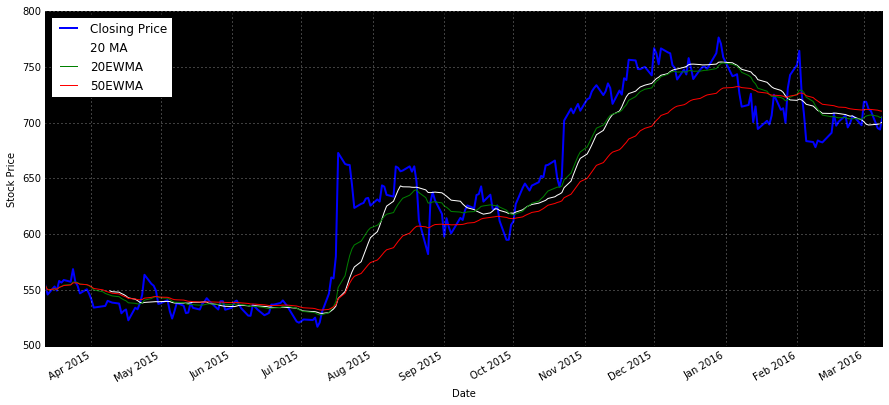

In [19]:
ax1 = plt.subplot2grid((6,4), (1,0), rowspan=6, colspan=4, axisbg='black')

df.closeP.plot(label='Closing Price',ax=ax1, linewidth=2,color = 'blue' )
df['20MA'].plot(label = '20 MA',ax=ax1, color='white')
ewma20.plot(label='20EWMA', color = 'green')
ewma50.plot(label='50EWMA', color = 'red')

ax1.grid('on',color='w')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.gcf().set_size_inches(15,8)
plt.legend(loc=2)
plt.show()
#Convert your string to a datetime using datetime.strptime. Then get a datetime.timedelta by subtracting the day 0 timestamp. 
#Then with the datetime.timedelta, extract the number of seconds, and divide by the number of seconds in a day. 
#This should give you a floating point number of days.

Instead of using the typical matplotlib plot, we can use pandas to plot. Notice that we have the date at the bottom formatted for us!

# What else can I do?

Well, like mentioned above, pandas has a [built-in subpackage](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) that reads financial data from sources like Yahoo! Finance and Google Finance. We will utilize that and plot some bar graphs to see the changes in a company's price a year from now!

**NOTE: Unfortunately in pandas 0.17.0 onwards, the sub-package pandas.io.data will be removed in favor of a separately installable [pandas-datareader package](https://github.com/pydata/pandas-datareader).**

In [24]:
import pandas.io.data as web

#### First, we will must understand that the pd.io.data.DataReader() functions takes 4 parameters: 

#### pd.io.data(the company's ticker's symbol, source of data, start time, end time)

**First, we will need to know the ticker symbol of the companies (ie., the symbol of the company from Yahoo! Finance) and we will also give the full name of the company for each ticker symbol. The first parameter has to be a dictionary, so we will need {}. We can do it as follows:**

In [21]:
company_list = {'EBAY': 'EBAY',
                'GOOG': 'GOOGLE', 
                'AAPL': 'Apple', 
                'SCHW': 'Charles Schwab',
                'BLK': 'Blackrock Corporation', 
                'FB':'Facebook',
                'C':'Citigroup',
                'RDS-B': 'Shell'}

**Let's define start and end time explicitly**

In [22]:
start = dt.datetime(2015, 3, 1)
end = dt.datetime.today()

**Now, let's see what we get from using the function pd.io.data.DataReader()**

In [23]:
data3 = web.DataReader('MSFT', 'yahoo', start, end)
data3.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-03-02,43.669998,44.189999,43.549999,43.880001,31924000,42.714399
2015-03-03,43.560001,43.830002,43.090000,43.279999,31748600,42.130335
2015-03-04,43.009998,43.209999,42.880001,43.060001,25748700,41.916181
2015-03-05,43.070000,43.240002,42.820000,43.110001,23193500,41.964852
2015-03-06,43.000000,43.110001,42.150002,42.360001,36248800,41.234775


That's the good thing about the pd.io.data.DataReader() function. It organizes everything and so it's easy for us to use. We can also pick out the column we want. In this case, we want the 'Close' column.

In [25]:
data3.Close.head()

Date
2015-03-02    43.880001
2015-03-03    43.279999
2015-03-04    43.060001
2015-03-05    43.110001
2015-03-06    42.360001
Name: Close, dtype: float64

## Let's plot the bar graph with what we know!

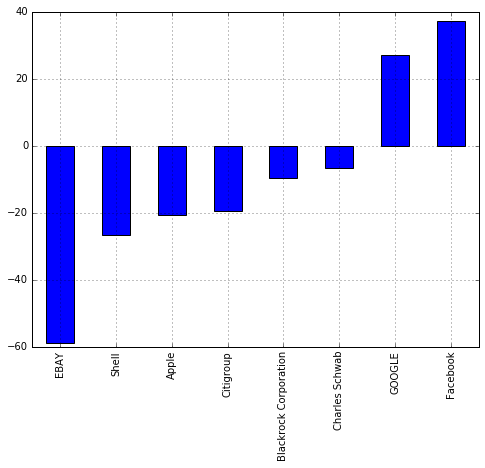

In [26]:
company_list = {'EBAY': 'EBAY',
                'GOOG': 'GOOGLE', 
                'AAPL': 'Apple', 
                'SCHW': 'Charles Schwab',
                'BLK': 'Blackrock Corporation', 
                'FB':'Facebook',
                'C':'Citigroup',
                'RDS-B': 'Shell'}

start = dt.datetime(2015, 3, 1)
end = dt.datetime.today()

#We want pct_change to be a dict so that we can pass it to pd.Series() and then we can plot the % change in price 
#of the companies from the starting date until current date!
pct_change = {}

for company in company_list:
    data = web.DataReader(company, 'yahoo', start, end)
    
    #We only want the values('Close') from the set of values in data
    closeP = data.Close
    
    #A simple formula to calculate % change in price from a year before. 
    #It's (current price - price from the 1st day)/ price from the 1st day * 100
    pctchange = 100 * (closeP[-1] - closeP[0]) / closeP[0]
    
    #Getting the 'actual' name of the company
    name = company_list[company]
    
    #This is the pctchange of each company
    pct_change[name] = pctchange

# We want pct_change as a series so that we can plot it on a x-axis/as an independent variable
percentchange = pd.Series(pct_change)

percentchange.sort_values(inplace=True)
plt.gcf().set_size_inches(8,6)
percentchange.plot(kind='bar')
plt.grid('on')
plt.show()

#### As a bonus, the code below allows you to take any company from Yahoo! Finance directly with 1d, 1y, 2y period as long as you know it's company's ticker symbol. This example here is slightly different than what we did in a sense that instead of needing a csv file to do the data analysis, I parsed the data from Yahoo directly. Also, notice that for 1 day data, I had to use the `pd.to_datetime()` to convert unix timestamp into standardized timestamp 

#### Eg., you can use 'GOOG','MSFT','EBAY' as ticker symbol to test out!

In [27]:
from matplotlib.finance import candlestick_ohlc
import io
import urllib
import urllib.request

Enter the ticker symbol:GOOG
GOOG
Enter time range:
1d = 1 day
1y = 1 year
2y = 2 year
1d


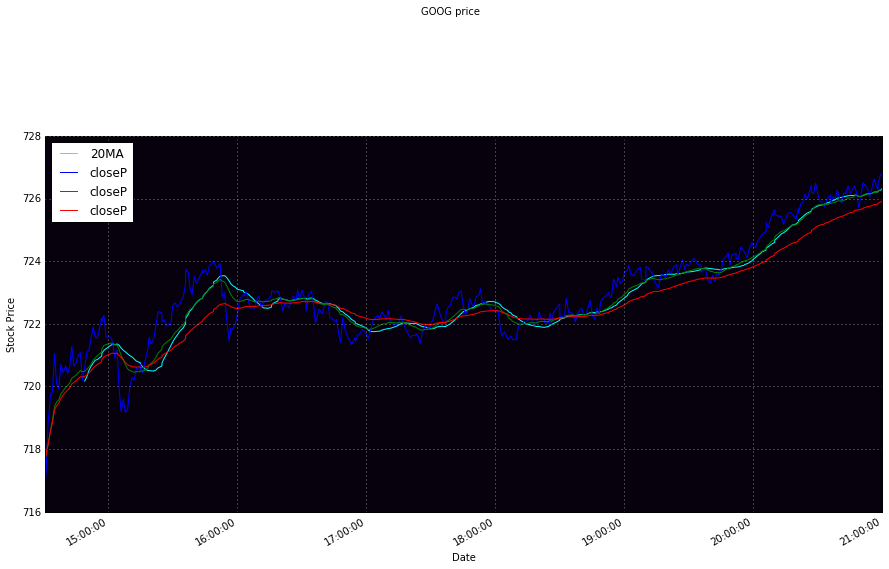

In [28]:
goURL = input('Enter the ticker symbol:')
print(goURL)
period = input('Enter time range:'+'\n'+'1d = 1 day'+'\n'
               +'1y = 1 year'+'\n'
               +'2y = 2 year'+'\n')
#URL of the source where the data is retrieved
urlToVisit = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+goURL+'/chartdata;type=quote;range='+period+'/csv'

#Opens the URL and read + decode the whole folder
with urllib.request.urlopen(urlToVisit) as response:
    sourcePage = response.read().decode()

if period == '1d':
    df = pd.read_csv(io.StringIO(sourcePage), skiprows=17, header=None, sep=",",
                 names=['date','closeP','highP','lowP','openP','volume'],index_col= 0)
    df.index = pd.to_datetime(df.index,unit='s')

if period =='1y':
    df = pd.read_csv(io.StringIO(sourcePage), skiprows=18, header=None, sep=",", 
                     names=['date','closeP','highP','lowP','openP','volume'],index_col= 0, parse_dates= True)

if period =='2y':
    df = pd.read_csv(io.StringIO(sourcePage), skiprows=19, header=None, sep=",", 
                     names=['date','closeP','highP','lowP','openP','volume'],index_col= 0, parse_dates= True)

df['10MA'] = pd.rolling_mean(df.closeP,10)
ewma20 = pd.ewma(df.closeP, span=20)
ewma50 = pd.ewma(df.closeP, span=50)

df['20MA'] = pd.rolling_mean(df.closeP,20)
df['stdev'] = pd.rolling_std(df.closeP,20)
upperband = df['20MA'] + (2*df.stdev)
lowerband = df['20MA'] - (2*df.stdev)

f1 = plt.subplot2grid((6,4), (1,0), rowspan=6, colspan=4, axisbg='#07000d')

plt.plot(df['20MA'],color='cyan')
df.closeP.plot(ax=f1)
ewma20.plot(ax=f1)
ewma50.plot(ax=f1)
plt.suptitle(goURL+' price')
f1.grid('on',color='w')
plt.xlabel('Date')
plt.ylabel('Stock Price')

#candlestick_ohlc(f1, DATA.values, width=.6, colorup='#53c156', colordown='#ff1717')
plt.gcf().set_size_inches(15,9)
plt.legend(loc=2)
plt.show()


## For more resources

[Data Analysis](https://pythonprogramming.net/data-analysis-python-pandas-tutorial-introduction/)

[Data Analysis with pandas, matplotlib, machine learning](https://pythonprogramming.net/data-analysis-tutorials/)
